In [1]:
#pip install customtkinter

In [2]:
#pip install openai

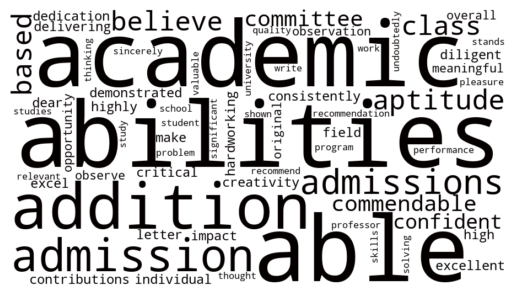

In [4]:
from tkinter import *
import customtkinter
from PIL import ImageTk, Image

import openai
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# openai.api_key = open('/Users/tuomasr/Library/Mobile Documents/com~apple~CloudDocs/School/ECS/ECS 171/Group Proj/key/Group_13_Project_Key.txt').read().strip('\n')
openai.api_key = open('C:\\Users\\socce\\OneDrive\\Documents\\Personal\\chatgpt.txt').read().strip('\n')


def wordcloud_Gen(scores):
    # change the value to black
    def black_color (word, font_size, position, orientation, random_state = None, **kwargs):
        return ("hsl(0, 100%, 1%)")

    # set the background color to white
    # word cloud for the user
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color = "white", 
                          width = 900, 
                          height = 500).generate_from_frequencies(scores.all())

    # set the word color to black
    wordcloud.recolor(color_func = black_color)

    # set the figsize
    # plt.figure(figsize = [15, 10])

    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

    wordcloud_image = wordcloud.to_image()
    wordcloud_image.save("wordcloud.png")
    image = ImageTk.PhotoImage(file="wordcloud.png")
    label = Label(w, image = image)
    label.place(relx=0.5, rely=0.7,  anchor=CENTER)


def letter_gen(user_name):
    name = ' '.join(user_name)
    text = f'Pretend you are a professor for at a popular university. You are asked by one of your students ({name}) if you can write them a letter of recommendation. Make up any information about them you feel is relevant to convey their abilities. Choose a field of study you believe is most fitting for them. Please do not include the heading'
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", # this is "ChatGPT" $0.002 per 1k tokens
        messages=[{"role": "user", "content": text}]
    )
    reply_content = completion.choices[0].message.content
    l1=customtkinter.CTkLabel(f1, text=reply_content,font=('Century Gothic', 9))
    l1.pack(padx=10, pady=10)

    # process data with tf-idf and exclude common stopwords
    vectorizer = TfidfVectorizer(stop_words='english')
    scores = vectorizer.fit_transform([reply_content]).toarray()

    # get term/feature names
    terms = vectorizer.get_feature_names_out()

    # form table of names with tf-idf scores corresponding to each term in their responses
    name_scores = pd.DataFrame(scores, columns=terms)
    # name_scores.insert(0, 'name', user_name)

    wordcloud_Gen(name_scores)

def show():
    w.deiconify()

def hide():
    w.withdraw()

def button_function():
    userName = user_name.get()
    app.destroy()            # destroy current window and creating new one 

    global w
    w = customtkinter.CTk()
    hide()
    
    Loading = customtkinter.CTkToplevel(w)
    Loading.geometry('1280x720')
    Loading.title("Group 13: Demo")
    l2 = customtkinter.CTkLabel(Loading, text = "Loading...", font=('Century Gothic',50))
    l2.place(relx=0.5, rely=0.4,  anchor=CENTER)

    progress = customtkinter.CTkProgressBar(master=Loading, width=500, height=25)
    progress.place(relx=0.5, rely=0.55,  anchor=CENTER) 
    progress.start()

    Loading.after(5000, func=Loading.destroy)
    w.after(5000, func=show)
    
    w.geometry("1280x720")
    w.title('Group 13: Demo')
    global f1
    f1=customtkinter.CTkFrame(master=w, width=1260, height=400, corner_radius=10)
    f1.place(relx=0.5, rely=0.19,  anchor=CENTER)

    letter_gen(userName)
   
    w.mainloop()


app = customtkinter.CTk()
app.geometry("1280x720")
app.title("Group 13: Demo")

frame1 = customtkinter.CTkFrame(master=app, width=1200, height=200, corner_radius=10)
frame1.grid(row=0, column=0, padx=20, pady=35)

title = customtkinter.CTkLabel(frame1, text="Analyze your letter of recommendation written by chatGPT", font=("Century Gothic", 40))
title.pack(padx=40, pady=40)

name_prompt = customtkinter.CTkLabel(app, text="Enter your full name:", font=("Century Gothic", 30, "italic"))
name_prompt.place(relx=0.27, rely=0.5,  anchor=CENTER)

user_name=customtkinter.CTkEntry(master=app, width=300, height=30, placeholder_text='Username')
user_name.place(relx=0.55, rely=0.504,  anchor=CENTER)

button1 = customtkinter.CTkButton(master=app, width=150, text="create", command=button_function, corner_radius=6)
button1.place(relx=0.54, rely=0.65,  anchor=CENTER)


app.mainloop()